In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [2]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_cpy=train.copy()
test_cpy=test.copy()

In [5]:
train.shape

(550068, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train.Product_ID.nunique()

3631

In [8]:
train.User_ID.nunique()

5891

In [9]:
train_cat=train.select_dtypes(include='object')
train_cat.drop(['Product_ID'],axis=1,inplace=True)
train_cat.columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

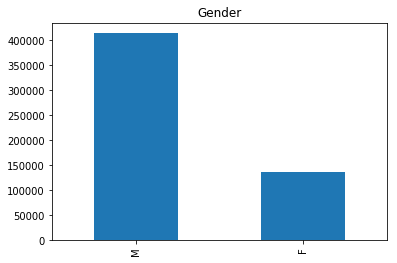

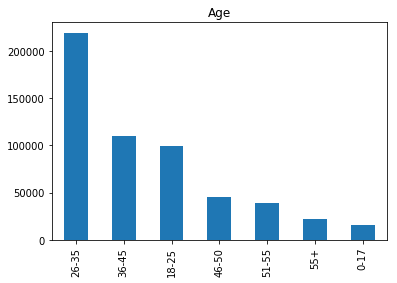

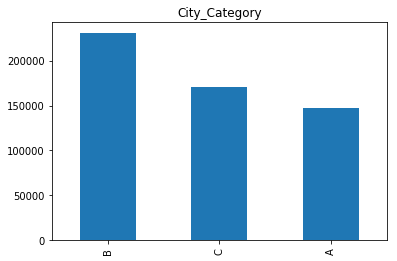

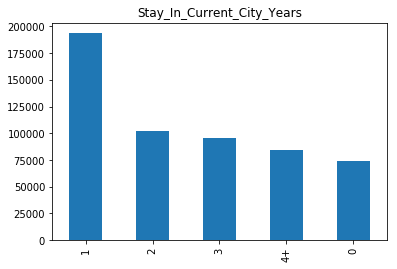

In [10]:
for i in train_cat.columns:
    train[i].value_counts().plot.bar()
    plt.title('{0}'.format(i))
    plt.show()

we can say higher number of males purchase.

Maximum buyers are in the age group 18-45.

City category B type has max buyers than C and least A.

The ones new in the city are heavy buyers.

In [11]:
train_numeric=train.select_dtypes(include=['int64','float64'])
train_numeric.drop(['User_ID'],axis=1,inplace=True)
train_numeric.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

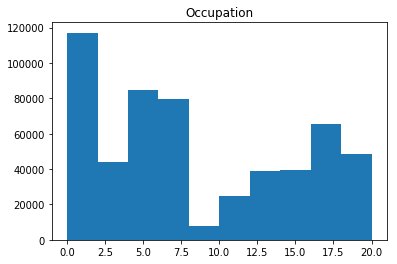

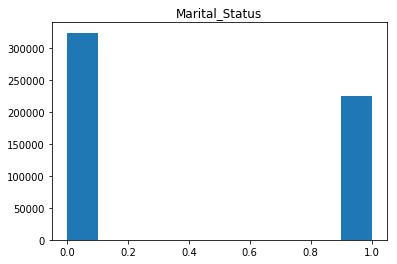

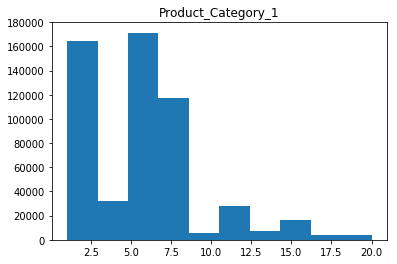

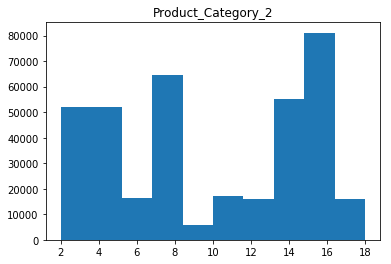

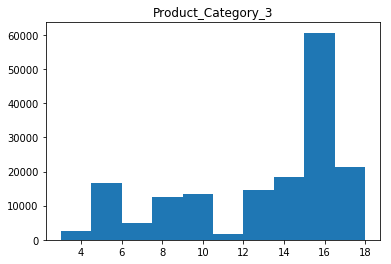

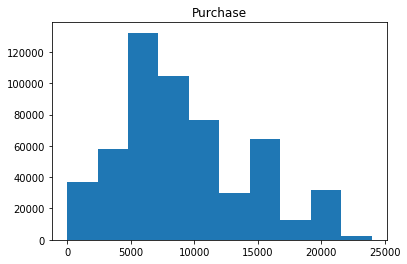

In [12]:
for i in train_numeric.columns:
    plt.hist(train[i])
    plt.title('{0}'.format(i))
    plt.show()

In [13]:
train_numeric.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


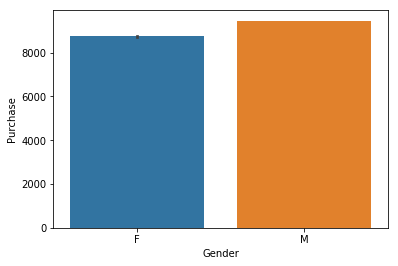

In [14]:
# bar plot with default statistic=mean
sns.barplot(x='Gender', y='Purchase', data=train)
plt.show()

# though majorly males shop but the purchase amount is quite close

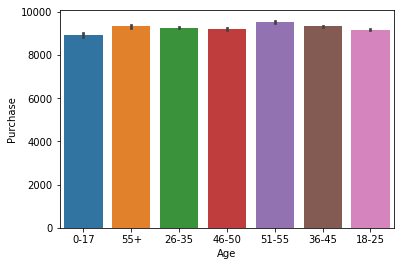

In [15]:
# bar plot with default statistic=mean
sns.barplot(x='Age', y='Purchase', data=train)
plt.show()

# purchase amount is same for almost all age groups

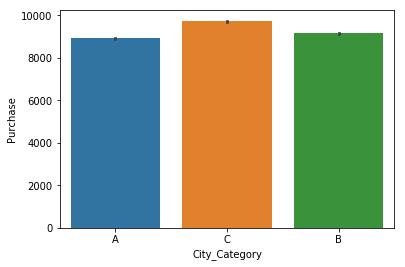

In [16]:
# bar plot with default statistic=mean
sns.barplot(x='City_Category', y='Purchase', data=train)
plt.show()

# purchase amount is higher for C

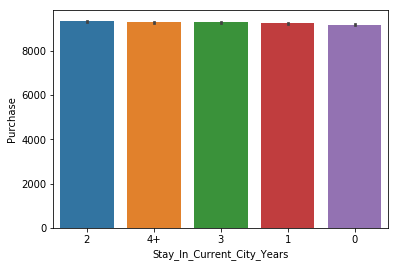

In [17]:
# bar plot with default statistic=mean
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=train)
plt.show()

# amount nearly same for all groups

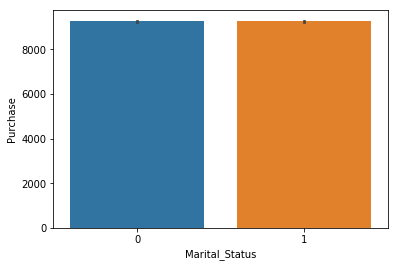

In [18]:
# bar plot with default statistic=mean
sns.barplot(x='Marital_Status', y='Purchase', data=train)
plt.show()

# amount nearly same for all groups

In [19]:
train["Product_Category_1_Count"] = train.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = train.groupby(['Product_Category_1']).size().to_dict()
test['Product_Category_1_Count'] = test['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

train["Product_Category_2_Count"] = train.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = train.groupby(['Product_Category_2']).size().to_dict()
test['Product_Category_2_Count'] = test['Product_Category_2'].apply(lambda x:pc2_count_dict.get(x,0))

train["Product_Category_3_Count"] = train.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = train.groupby(['Product_Category_3']).size().to_dict()
test['Product_Category_3_Count'] = test['Product_Category_3'].apply(lambda x:pc3_count_dict.get(x,0))

train["User_ID_Count"] = train.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = train.groupby(['User_ID']).size().to_dict()
test['User_ID_Count'] = test['User_ID'].apply(lambda x:userID_count_dict.get(x,0))

train["Product_ID_Count"] = train.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = train.groupby(['Product_ID']).size().to_dict()
test['Product_ID_Count'] = test['Product_ID'].apply(lambda x:productID_count_dict.get(x,0))

In [20]:
train["User_ID_MinPrice"] = train.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = train.groupby(['User_ID'])['Purchase'].min().to_dict()
test['User_ID_MinPrice'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

train["User_ID_MaxPrice"] = train.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = train.groupby(['User_ID'])['Purchase'].max().to_dict()
test['User_ID_MaxPrice'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

train["User_ID_MeanPrice"] = train.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = train.groupby(['User_ID'])['Purchase'].mean().to_dict()
test['User_ID_MeanPrice'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))


train["Product_ID_MinPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = train.groupby(['Product_ID'])['Purchase'].min().to_dict()
test['Product_ID_MinPrice'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

train["Product_ID_MaxPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = train.groupby(['Product_ID'])['Purchase'].max().to_dict()
test['Product_ID_MaxPrice'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

train["Product_ID_MeanPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = train.groupby(['Product_ID'])['Purchase'].mean().to_dict()
test['Product_ID_MeanPrice'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))


In [21]:
userID_25p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['User_ID_25PercPrice'] = train['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
test['User_ID_25PercPrice'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_75p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['User_ID_75PercPrice'] = train['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
test['User_ID_75PercPrice'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))

productID_25p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_ID_25PercPrice'] = train['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
test['Product_ID_25PercPrice'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_75p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_ID_75PercPrice'] = train['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
test['Product_ID_75PercPrice'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))


In [22]:
round((train.isnull().sum()/len(train.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
Product_Category_1_Count       0.00
Product_Category_2_Count      31.57
Product_Category_3_Count      69.67
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [23]:
round((test.isnull().sum()/len(test.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.97
Product_Category_3            69.59
Product_Category_1_Count       0.00
Product_Category_2_Count       0.00
Product_Category_3_Count       0.00
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 27 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
Product_Category_1_Count      550068 non-null int64
Product_Category_2_Count      376430 non-null float64
Product_Category_3_Count      166821 non-null float64
User_ID_Count                 550068 non-null int64
Product_ID_Count              550068 non-nul

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['Age']=le.fit_transform(train['Age'])
test['Age']=le.fit_transform(test['Age'])

train['City_Category']=le.fit_transform(train['City_Category'])
test['City_Category']=le.fit_transform(test['City_Category'])

train['Stay_In_Current_City_Years']=le.fit_transform(train['Stay_In_Current_City_Years'])
test['Stay_In_Current_City_Years']=le.fit_transform(test['Stay_In_Current_City_Years'])

# train['Gender']=train['Gender'].map({'M':1, 'F':0})
# test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [26]:
pd.set_option('display.max_columns', 100)
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,F,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.50,12305.5,10804.00,13475.50
1,1000001,P00248942,F,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.50,12305.5,15312.00,19264.00
2,1000001,P00087842,F,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.50,12305.5,1043.75,1423.75
3,1000001,P00085442,F,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.50,12305.5,1378.00,1736.00
4,1000002,P00285442,M,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.00,11973.0,6174.50,8082.50
5,1000003,P00193542,M,2,15,0,3,0,1,2.0,NaN,15227,140378,49217.0,NaN,29,615,3646,19631,11780.517241,3828,19698,14318.772358,6953.00,15592.0,11722.50,15821.00
6,1000004,P00184942,M,4,7,1,2,1,1,8.0,17.0,19215,140378,64088.0,16702.0,14,1440,481,19693,14747.714286,3809,19707,16899.227083,15488.50,19087.0,15421.25,19362.00
7,1000004,P00346142,M,4,7,1,2,1,1,15.0,NaN,15854,140378,37855.0,NaN,14,593,481,19693,14747.714286,3847,19698,14169.618887,15488.50,19087.0,11730.00,15837.00
8,1000004,P0097242,M,4,7,1,2,1,1,16.0,NaN,15686,140378,43255.0,NaN,14,912,481,19693,14747.714286,3936,19708,15947.346491,15488.50,19087.0,15263.25,19178.75
9,1000005,P00274942,M,2,20,0,1,1,8,NaN,NaN,7871,113925,NaN,NaN,106,793,1938,21021,7745.292453,1940,10082,8068.920555,4551.75,8823.0,7762.00,9844.00


In [27]:
train['Gender']=train['Gender'].map({'M':1, 'F':0})
test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [28]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [29]:
#filling missing values in product categories 2 & 3 by by any constant number say 0
train['Product_Category_2']=train['Product_Category_2'].fillna(0)
test['Product_Category_2']=test['Product_Category_2'].fillna(0)

train['Product_Category_3']=train['Product_Category_3'].fillna(0)
test['Product_Category_3']=test['Product_Category_3'].fillna(0)

train['Product_Category_2_Count']=train['Product_Category_2_Count'].fillna(0)
test['Product_Category_2_Count']=test['Product_Category_2_Count'].fillna(0)

train['Product_Category_3_Count']=train['Product_Category_3_Count'].fillna(0)
test['Product_Category_3_Count']=test['Product_Category_3_Count'].fillna(0)

In [30]:
round((test.isnull().sum()/len(test.index))*100,2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Product_Category_1_Count      0.0
Product_Category_2_Count      0.0
Product_Category_3_Count      0.0
User_ID_Count                 0.0
Product_ID_Count              0.0
User_ID_MinPrice              0.0
User_ID_MaxPrice              0.0
User_ID_MeanPrice             0.0
Product_ID_MinPrice           0.0
Product_ID_MaxPrice           0.0
Product_ID_MeanPrice          0.0
User_ID_25PercPrice           0.0
User_ID_75PercPrice           0.0
Product_ID_25PercPrice        0.0
Product_ID_75PercPrice        0.0
dtype: float64

In [31]:
train=train.drop(['User_ID','Product_ID'],axis=1)
test=test.drop(['User_ID','Product_ID'],axis=1)

In [32]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,0,0,10,0,2,0,3,0.0,0.0,8370,20213,0.0,0.0,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,0,0,10,0,2,0,12,0.0,0.0,1422,3947,0.0,0.0,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,0,0,10,0,2,0,12,14.0,0.0,1057,3947,55108.0,0.0,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1,6,16,2,4,0,8,0.0,0.0,7969,113925,0.0,0.0,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [33]:
q1 = train['Purchase'].quantile(0.25)
q3 = train['Purchase'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
train = train[(train['Purchase'] > fence_low) & (train['Purchase'] < fence_high)]

In [34]:

X=train.drop('Purchase',1)
y=train['Purchase']


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
# # Create the parameter grid based on the results of random search 
# param_grid = {
# 'max_depth': [10], 'max_features': [10], 'min_samples_leaf': [100], 
# 'min_samples_split': [200], 'n_estimators': [200]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1,verbose = 1)

In [37]:
# Fit the grid search to the data
# grid_search.fit(X, y)

In [38]:
# printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
# We can get accuracy of 0.6598673565353703 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}

In [39]:
# # plotting accuracies with max_depth
# plt.figure()
# plt.plot(scores["param_max_depth"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_max_depth"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("max_depth")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()


In [43]:
# y_test_pred=grid_search.predict(test)

In [44]:
# finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred,columns=['Purchase'])],1)
# finalpred.to_csv("RF.csv",index=False)

### XGBOOST 

In [45]:
import xgboost as xgb 
from xgboost.sklearn import XGBRegressor

In [46]:
params = {}
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["max_depth"] = 10
params["seed"] = 0
plst = list(params.items())
num_rounds = 1100

In [47]:
xgb=XGBRegressor()

In [52]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [55]:
y_test_pred_x=xgb.predict(test)

In [56]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_x,columns=['Purchase'])],1)
finalpred.to_csv("xgb.csv",index=False)

### Light GBM

In [68]:
import lightgbm as lgb

In [69]:
lgbm=lgb.LGBMRegressor()

In [70]:
# params={'colsample_bytree': [0.7], 'learning_rate': [0.07], 'max_depth': [15], 'min_child_weight': [4],
#         'n_estimators': [100], 'subsample': [0.5]}

params={'num_leaves':[200], 'objective':['regression'],'max_depth':[15],'learning_rate':[.1],'max_bin':[200]}

In [71]:
# model = GridSearchCV(lgbm,
#                         params,
#                         cv = 3,
#                         n_jobs = 5,
#                         verbose=True)



In [72]:
# model.fit(X,y)

In [75]:
# y_test_pred_l=model.predict(test)

In [76]:
# finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_l,columns=['Purchase'])],1)
# finalpred.to_csv("lgbm.csv",index=False)

### Catboost

In [77]:
import catboost as cb

In [78]:
model=cb.CatBoostRegressor()

In [79]:
grid = {'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [15]}

model = GridSearchCV(model,
                        grid,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

In [80]:
model.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed: 21.4min finished


0:	learn: 4588.6583441	total: 622ms	remaining: 10m 21s
1:	learn: 4283.3683239	total: 1.15s	remaining: 9m 34s
2:	learn: 4017.1240409	total: 1.65s	remaining: 9m 8s
3:	learn: 3787.1038880	total: 2.09s	remaining: 8m 41s
4:	learn: 3589.6160636	total: 2.54s	remaining: 8m 25s
5:	learn: 3416.8443510	total: 3.02s	remaining: 8m 21s
6:	learn: 3270.1353215	total: 3.48s	remaining: 8m 13s
7:	learn: 3144.8494663	total: 3.95s	remaining: 8m 9s
8:	learn: 3038.9091171	total: 4.43s	remaining: 8m 7s
9:	learn: 2949.9834377	total: 4.88s	remaining: 8m 2s
10:	learn: 2874.8885745	total: 5.35s	remaining: 8m 1s
11:	learn: 2811.0694512	total: 5.81s	remaining: 7m 58s
12:	learn: 2758.4528520	total: 6.26s	remaining: 7m 54s
13:	learn: 2714.8743666	total: 6.73s	remaining: 7m 53s
14:	learn: 2678.1847200	total: 7.17s	remaining: 7m 51s
15:	learn: 2647.2237976	total: 7.64s	remaining: 7m 49s
16:	learn: 2620.9894700	total: 8.1s	remaining: 7m 48s
17:	learn: 2599.5555276	total: 8.55s	remaining: 7m 46s
18:	learn: 2581.1489682	t

149:	learn: 2406.0214003	total: 1m 24s	remaining: 8m 1s
150:	learn: 2405.7708658	total: 1m 25s	remaining: 8m
151:	learn: 2405.3864656	total: 1m 25s	remaining: 7m 58s
152:	learn: 2405.0187329	total: 1m 26s	remaining: 7m 57s
153:	learn: 2404.6093385	total: 1m 26s	remaining: 7m 56s
154:	learn: 2404.1353994	total: 1m 27s	remaining: 7m 54s
155:	learn: 2403.7560718	total: 1m 27s	remaining: 7m 53s
156:	learn: 2403.2743452	total: 1m 27s	remaining: 7m 52s
157:	learn: 2402.7763683	total: 1m 28s	remaining: 7m 51s
158:	learn: 2402.0934171	total: 1m 28s	remaining: 7m 49s
159:	learn: 2401.7447819	total: 1m 29s	remaining: 7m 48s
160:	learn: 2401.2802923	total: 1m 29s	remaining: 7m 47s
161:	learn: 2400.7718233	total: 1m 30s	remaining: 7m 46s
162:	learn: 2400.4572153	total: 1m 30s	remaining: 7m 45s
163:	learn: 2400.0685369	total: 1m 31s	remaining: 7m 44s
164:	learn: 2399.6340036	total: 1m 32s	remaining: 7m 46s
165:	learn: 2399.2954034	total: 1m 33s	remaining: 7m 49s
166:	learn: 2398.9962210	total: 1m 3

294:	learn: 2354.0118998	total: 2m 45s	remaining: 6m 35s
295:	learn: 2353.4822490	total: 2m 46s	remaining: 6m 36s
296:	learn: 2353.2982828	total: 2m 47s	remaining: 6m 37s
297:	learn: 2352.9582922	total: 2m 48s	remaining: 6m 37s
298:	learn: 2352.7197868	total: 2m 49s	remaining: 6m 36s
299:	learn: 2352.3640672	total: 2m 49s	remaining: 6m 35s
300:	learn: 2351.8927354	total: 2m 50s	remaining: 6m 34s
301:	learn: 2351.4185920	total: 2m 50s	remaining: 6m 34s
302:	learn: 2351.1849408	total: 2m 50s	remaining: 6m 33s
303:	learn: 2351.0044902	total: 2m 51s	remaining: 6m 32s
304:	learn: 2350.5719979	total: 2m 51s	remaining: 6m 31s
305:	learn: 2350.1230333	total: 2m 52s	remaining: 6m 30s
306:	learn: 2349.8395113	total: 2m 52s	remaining: 6m 29s
307:	learn: 2349.5953715	total: 2m 53s	remaining: 6m 28s
308:	learn: 2349.2873554	total: 2m 53s	remaining: 6m 28s
309:	learn: 2349.0888739	total: 2m 54s	remaining: 6m 27s
310:	learn: 2348.8285010	total: 2m 54s	remaining: 6m 26s
311:	learn: 2348.4553451	total:

439:	learn: 2312.5331670	total: 4m 5s	remaining: 5m 12s
440:	learn: 2312.2915478	total: 4m 6s	remaining: 5m 11s
441:	learn: 2312.0346649	total: 4m 7s	remaining: 5m 12s
442:	learn: 2311.6522669	total: 4m 8s	remaining: 5m 12s
443:	learn: 2311.4804540	total: 4m 8s	remaining: 5m 11s
444:	learn: 2311.2602777	total: 4m 9s	remaining: 5m 10s
445:	learn: 2310.9624616	total: 4m 9s	remaining: 5m 10s
446:	learn: 2310.7902256	total: 4m 10s	remaining: 5m 9s
447:	learn: 2310.5628677	total: 4m 10s	remaining: 5m 8s
448:	learn: 2310.3673841	total: 4m 10s	remaining: 5m 7s
449:	learn: 2310.1397402	total: 4m 11s	remaining: 5m 7s
450:	learn: 2309.9845904	total: 4m 11s	remaining: 5m 6s
451:	learn: 2309.7802486	total: 4m 12s	remaining: 5m 5s
452:	learn: 2309.5526513	total: 4m 12s	remaining: 5m 4s
453:	learn: 2309.2843581	total: 4m 13s	remaining: 5m 4s
454:	learn: 2308.8700757	total: 4m 15s	remaining: 5m 5s
455:	learn: 2308.6430043	total: 4m 15s	remaining: 5m 5s
456:	learn: 2308.3550770	total: 4m 16s	remaining

585:	learn: 2278.0142997	total: 5m 27s	remaining: 3m 51s
586:	learn: 2277.7890516	total: 5m 28s	remaining: 3m 50s
587:	learn: 2277.6342458	total: 5m 29s	remaining: 3m 50s
588:	learn: 2277.3902822	total: 5m 29s	remaining: 3m 50s
589:	learn: 2277.2797248	total: 5m 30s	remaining: 3m 49s
590:	learn: 2277.1022816	total: 5m 30s	remaining: 3m 48s
591:	learn: 2276.9025360	total: 5m 31s	remaining: 3m 48s
592:	learn: 2276.7993530	total: 5m 31s	remaining: 3m 47s
593:	learn: 2276.4741705	total: 5m 32s	remaining: 3m 46s
594:	learn: 2276.3705868	total: 5m 32s	remaining: 3m 46s
595:	learn: 2276.1387463	total: 5m 32s	remaining: 3m 45s
596:	learn: 2275.8627149	total: 5m 33s	remaining: 3m 45s
597:	learn: 2275.6425528	total: 5m 33s	remaining: 3m 44s
598:	learn: 2275.4456241	total: 5m 34s	remaining: 3m 43s
599:	learn: 2275.3292292	total: 5m 34s	remaining: 3m 43s
600:	learn: 2275.0769202	total: 5m 35s	remaining: 3m 42s
601:	learn: 2274.9651952	total: 5m 36s	remaining: 3m 42s
602:	learn: 2274.7463024	total:

730:	learn: 2248.0665887	total: 6m 49s	remaining: 2m 30s
731:	learn: 2247.8673352	total: 6m 49s	remaining: 2m 30s
732:	learn: 2247.6572373	total: 6m 50s	remaining: 2m 29s
733:	learn: 2247.3644102	total: 6m 50s	remaining: 2m 28s
734:	learn: 2247.1726913	total: 6m 51s	remaining: 2m 28s
735:	learn: 2247.0068345	total: 6m 51s	remaining: 2m 27s
736:	learn: 2246.7840898	total: 6m 52s	remaining: 2m 27s
737:	learn: 2246.5934351	total: 6m 52s	remaining: 2m 26s
738:	learn: 2246.4635558	total: 6m 52s	remaining: 2m 25s
739:	learn: 2246.3285807	total: 6m 53s	remaining: 2m 25s
740:	learn: 2246.2893269	total: 6m 54s	remaining: 2m 24s
741:	learn: 2246.0100077	total: 6m 55s	remaining: 2m 24s
742:	learn: 2245.8645562	total: 6m 56s	remaining: 2m 24s
743:	learn: 2245.6498654	total: 6m 56s	remaining: 2m 23s
744:	learn: 2245.5742465	total: 6m 57s	remaining: 2m 22s
745:	learn: 2245.2840860	total: 6m 57s	remaining: 2m 22s
746:	learn: 2245.0312711	total: 6m 58s	remaining: 2m 21s
747:	learn: 2244.7621685	total:

875:	learn: 2220.2158614	total: 8m 10s	remaining: 1m 9s
876:	learn: 2220.0622197	total: 8m 11s	remaining: 1m 8s
877:	learn: 2219.8942176	total: 8m 11s	remaining: 1m 8s
878:	learn: 2219.7328671	total: 8m 12s	remaining: 1m 7s
879:	learn: 2219.5512694	total: 8m 12s	remaining: 1m 7s
880:	learn: 2219.3511204	total: 8m 12s	remaining: 1m 6s
881:	learn: 2219.0614429	total: 8m 13s	remaining: 1m 6s
882:	learn: 2218.7597911	total: 8m 15s	remaining: 1m 5s
883:	learn: 2218.5672167	total: 8m 16s	remaining: 1m 5s
884:	learn: 2218.4340683	total: 8m 17s	remaining: 1m 4s
885:	learn: 2218.3349437	total: 8m 17s	remaining: 1m 4s
886:	learn: 2218.2096176	total: 8m 17s	remaining: 1m 3s
887:	learn: 2218.0184915	total: 8m 18s	remaining: 1m 2s
888:	learn: 2217.8789683	total: 8m 18s	remaining: 1m 2s
889:	learn: 2217.6944829	total: 8m 19s	remaining: 1m 1s
890:	learn: 2217.5132031	total: 8m 19s	remaining: 1m 1s
891:	learn: 2217.2850998	total: 8m 20s	remaining: 1m
892:	learn: 2217.1019982	total: 8m 20s	remaining: 6

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostRegressor object at 0x0000000012790DD8>,
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'learning_rate': [0.1], 'depth': [10], 'l2_leaf_reg': [15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [84]:
y_test_predict_c=model.predict(test)

In [85]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_predict_c,columns=['Purchase'])],1)
finalpred.to_csv("catb_1.csv",index=False)

## Stacked Models



Creating 2 LightBoost Models both with different learning rates and different set of features for both of them

   Light Boost model 1 (learning rate = 0.5), and features set = alist + blist (mentioned below)
   
   Light Boost model 2 (learinng rate = 0.8), and features set = alist + clist** (mentioned below)



In [89]:
alist = ['Gender',
'Age',
'Occupation',
'City_Category',
'Stay_In_Current_City_Years',
'Marital_Status',
'Product_Category_1',
'Product_Category_2',
'Product_Category_3',
'User_ID_Count',
'Product_ID_Count']
         
blist = ['User_ID_MinPrice',
'User_ID_MaxPrice',
'User_ID_MeanPrice',
'Product_ID_MinPrice',
'Product_ID_MaxPrice',
'Product_ID_MeanPrice']

clist = ['User_ID_25PercPrice',
'User_ID_75PercPrice',
'Product_ID_25PercPrice',
'Product_ID_75PercPrice',
'Product_Category_1_Count',
'Product_Category_2_Count',
'Product_Category_3_Count',]


In [90]:
#XGB model 1 dataframe
train1 = train[alist+blist]
test1 = test[alist+blist]

#XGB model 2 dataframe 
train2 = train[alist+clist]
test2 = test[alist+clist]

In [91]:
# train1_x=train1.drop(['Purchase'],axis=1)
# train_1_y=train1['Purchase']

In [92]:
mod_1=lgb.LGBMRegressor(learning_rate=[.2],importance_type='gain')
mod_2=lgb.LGBMRegressor(learning_rate=[.4],importance_type='gain')

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(train1,y,test_size=0.2,random_state=42)

In [96]:
mod_1.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='gain', learning_rate=[0.2], max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [97]:
y_test=mod_1.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2453.1635354670116


In [99]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_1.feature_importances_})

keys = list(X_train.columns)
values = list(mod_1.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})

,Features,Importance (%)
0,Product_ID_MeanPrice,93.9
1,User_ID_MeanPrice,3.69
2,User_ID_Count,0.57
3,User_ID_MaxPrice,0.54
4,Product_ID_MaxPrice,0.3
5,User_ID_MinPrice,0.21
6,Product_ID_MinPrice,0.12
7,Age,0.11
8,Gender,0.11
9,Product_ID_Count,0.1


Text(0, 0.5, 'Features')

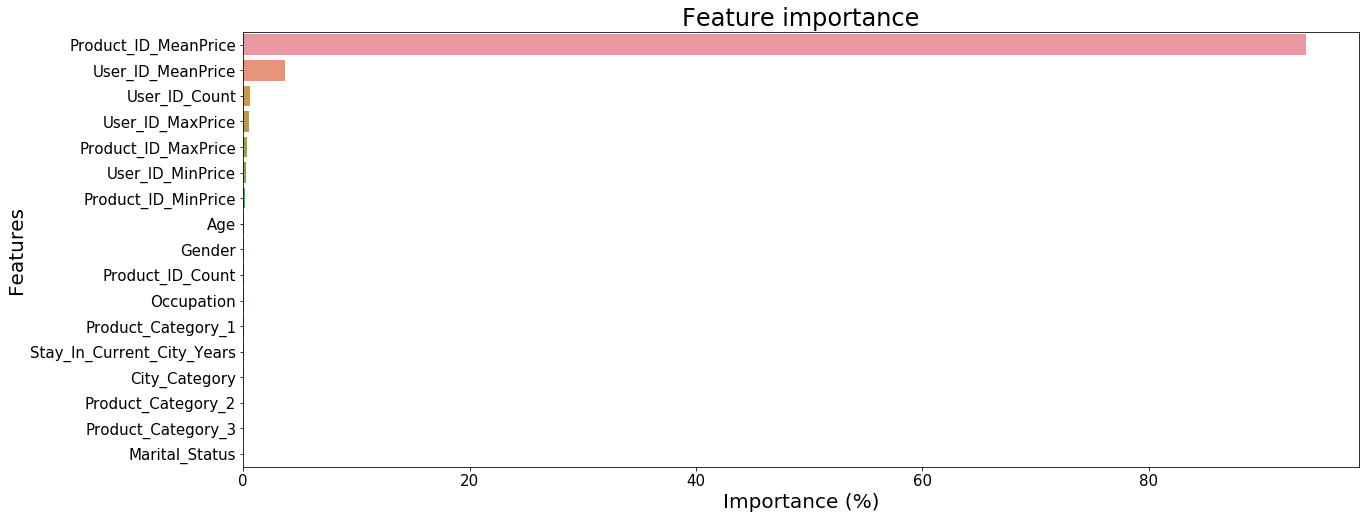

In [100]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [101]:
#prediction1
pred_lgbm_m1 = mod_1.predict(test1)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m1,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod1.csv',index=False)

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(train2,y,test_size=0.2,random_state=42)

In [103]:
mod_2.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='gain', learning_rate=[0.4], max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [104]:
y_test=mod_2.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2454.5299972046505


In [106]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_2.feature_importances_})

keys = list(X_train.columns)
values = list(mod_2.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})

,Features,Importance (%)
0,Product_ID_75PercPrice,79.88
1,Product_ID_25PercPrice,13.53
2,User_ID_75PercPrice,2.57
3,User_ID_25PercPrice,2.22
4,User_ID_Count,0.6
5,Product_ID_Count,0.2
6,Product_Category_1,0.16
7,Age,0.15
8,Occupation,0.15
9,Gender,0.1


Text(0, 0.5, 'Features')

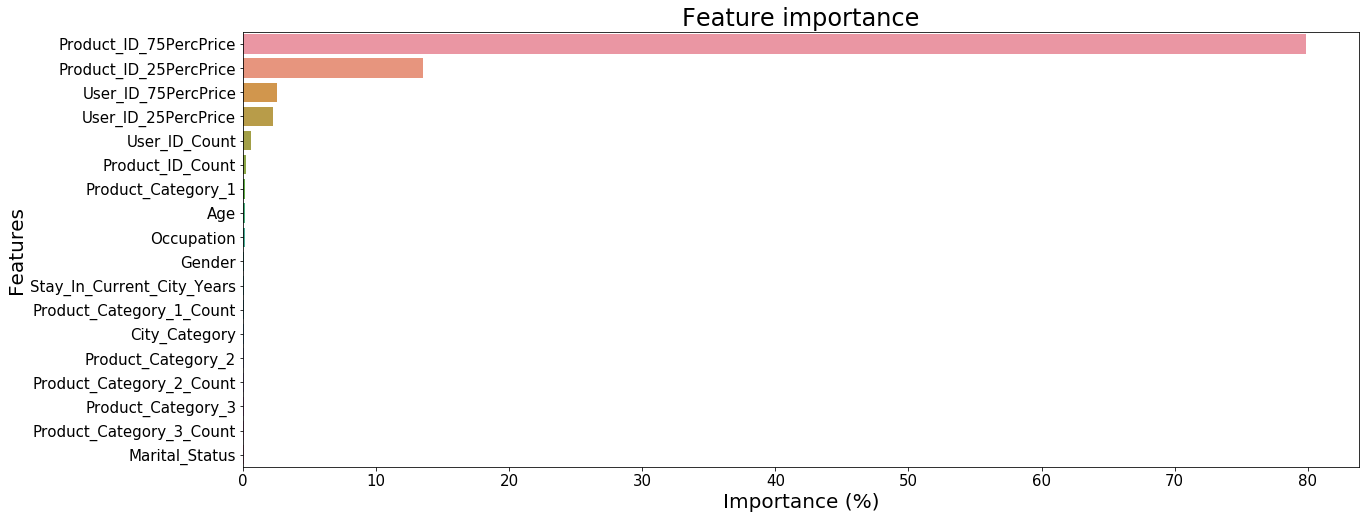

In [107]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [108]:
#prediction2
pred_lgbm_m2 = mod_2.predict(test2)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m2,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod2.csv',index=False)

In [109]:
## Weighted average of above two models

In [110]:
sub['Purchase'] = 0.5*pred_lgbm_m1 + 0.5*pred_lgbm_m2
sub.to_csv('final.csv',index=False)

In [111]:
### CATBoost is the final model, as it has performed better than the stacked model